In [1]:
import numpy as np

Iteration: 200, Max Difference: 1.21e-03
Iteration: 400, Max Difference: 6.04e-04
Iteration: 600, Max Difference: 4.00e-04
Iteration: 800, Max Difference: 2.95e-04
Iteration: 1000, Max Difference: 2.30e-04
Iteration: 1200, Max Difference: 1.85e-04
Iteration: 1400, Max Difference: 1.52e-04
Iteration: 1600, Max Difference: 1.28e-04
Iteration: 1800, Max Difference: 1.09e-04
Iteration: 2000, Max Difference: 9.34e-05
Iteration: 2200, Max Difference: 8.10e-05
Iteration: 2400, Max Difference: 7.08e-05
Iteration: 2600, Max Difference: 6.22e-05
Iteration: 2800, Max Difference: 5.50e-05
Iteration: 3000, Max Difference: 4.89e-05
Iteration: 3200, Max Difference: 4.36e-05
Iteration: 3400, Max Difference: 3.90e-05
Iteration: 3600, Max Difference: 3.50e-05
Iteration: 3800, Max Difference: 3.15e-05
Iteration: 4000, Max Difference: 2.83e-05
Iteration: 4200, Max Difference: 2.55e-05
Iteration: 4400, Max Difference: 2.31e-05
Iteration: 4600, Max Difference: 2.08e-05
Iteration: 4800, Max Difference: 1.88e

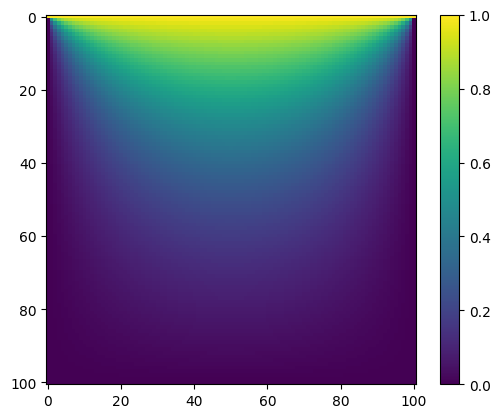

In [2]:
#Jacobi relaxation method to solve Laplace equation
#from pylab import imshow,gray,show
import matplotlib.pyplot as plt

#set up grid
nx,ny = 100,100
phi_ori = np.zeros([nx+1,ny+1],float)
phi_new = np.zeros([nx+1,ny+1],float)

phi_ori[0,:] = 1
#phi_ori[nx,:] =1
threshold = 1e-7
diff = 1
iteration = 0

while diff > threshold:

    for i in range (nx+1):
        for j in range (ny+1):
            if i ==0 or i ==100 or j==0 or j ==100:
                phi_new[i,j] = phi_ori[i,j]
            else:
                phi_new[i,j]= 1/4*(phi_ori[i+1,j]+phi_ori[i-1,j]+phi_ori[i,j+1]+phi_ori[i,j-1])

    diff = np.max(abs(phi_new-phi_ori))

    #swapping so that phi_ori is updated
    phi_ori,phi_new = phi_new,phi_ori
    iteration+=1

    if iteration %200 ==0:
        print (f"Iteration: {iteration}, Max Difference: {diff:.2e}")
plt.imshow(phi_new)
plt.colorbar()

Iteration: 200, Max Difference: 1.17e-03
Iteration: 400, Max Difference: 5.76e-04
Iteration: 600, Max Difference: 3.62e-04
Iteration: 800, Max Difference: 2.50e-04
Iteration: 1000, Max Difference: 1.83e-04
Iteration: 1200, Max Difference: 1.39e-04
Iteration: 1400, Max Difference: 1.08e-04
Iteration: 1600, Max Difference: 8.53e-05
Iteration: 1800, Max Difference: 6.85e-05
Iteration: 2000, Max Difference: 5.54e-05
Iteration: 2200, Max Difference: 4.51e-05
Iteration: 2400, Max Difference: 3.68e-05
Iteration: 2600, Max Difference: 3.02e-05
Iteration: 2800, Max Difference: 2.47e-05
Iteration: 3000, Max Difference: 2.03e-05
Iteration: 3200, Max Difference: 1.66e-05
Iteration: 3400, Max Difference: 1.36e-05
Iteration: 3600, Max Difference: 1.12e-05


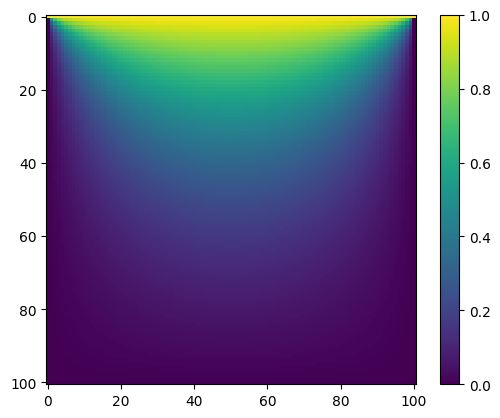

In [4]:
#Gauss-Seidel method to solve Laplace equation
#this is faster than Jacobi by a factor of 2 (in only 8200 iterations compared to 15400 for Jacobi)
#from pylab import imshow,gray,show
import matplotlib.pyplot as plt

#set up grid
nx,ny = 100,100
phi_ori = np.zeros([nx+1,ny+1],float)
phi_new = np.zeros([nx+1,ny+1],float)

phi_ori[0,:] = 1
#phi_ori[nx,:] =1
threshold = 1e-5
diff = 1
iteration = 0
a = []
while diff > threshold:

    for i in range (nx+1):
        for j in range (ny+1):
            if i ==0 or i ==100 or j==0 or j ==100:
                phi_new[i,j] = phi_ori[i,j]
            else:
                phi_new[i,j]= 1/4*(phi_new[i+1,j]+phi_new[i-1,j]+phi_new[i,j+1]+phi_new[i,j-1])
                #a.append(abs(phi_new[i,j]-phi_ori[i,j]))
                #phi_ori[i,j] = phi_new[i,j]
 

    diff = np.max(abs(phi_new-phi_ori))

    #swapping so that phi_ori is updated
    phi_ori = phi_new.copy()
    iteration+=1

    if iteration %200 ==0:
        print (f"Iteration: {iteration}, Max Difference: {diff:.2e}")
plt.imshow(phi_new)
plt.colorbar()

In [5]:
# Successive Over-Relaxation (SOR) method to solve Laplace equation

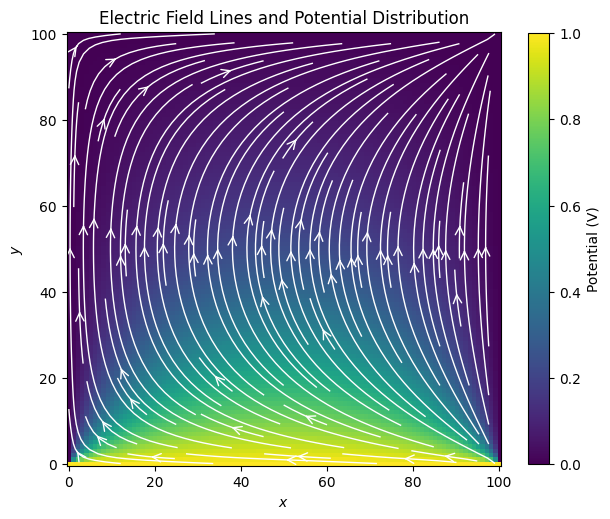

In [14]:
#https://scipython.com/blog/visualizing-a-vector-field-with-matplotlib/
# Electric field components
# Ex = -dV/dx
# Ey = -dV/dy

# Create arrays for the field components
Ex = np.zeros([nx + 1, ny + 1], float)
Ey = np.zeros([nx + 1, ny + 1], float)

x = np.linspace(0, nx, nx + 1)
y = np.linspace(0, ny, ny + 1)
X, Y = np.meshgrid(x, y)

# Calculate the electric field components from the potential
for i in range(1, nx):
    for j in range(1, ny):
        #row of an array is 'i' (y-direction)
        #column of an array is 'j' (x-direction)
        Ex[i, j] = -(phi_new[i, j + 1] - phi_new[i, j - 1]) / 2.0
        Ey[i, j] = -(phi_new[i + 1, j] - phi_new[i - 1, j]) / 2.0

fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('Electric Field Lines and Potential Distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

#transpose Ex and Ey to align with X and Y
#magnitude = np.hypot(Ex.T, Ey.T)
#color = 2 * np.log(magnitude + 1e-9)

ax.streamplot(X, Y, Ex.T, Ey.T, color='white', linewidth=1, cmap=plt.cm.inferno,
              density=1.5, arrowstyle='->', arrowsize=1.5)

plt.imshow(phi_new, origin='lower')
plt.colorbar(label="Potential (V)",shrink=0.8)
plt.show()

Iteration: 200, Max Difference: 4.71e+01
Iteration: 400, Max Difference: 3.38e+01
Iteration: 600, Max Difference: 2.63e+01
Iteration: 800, Max Difference: 2.10e+01
Iteration: 1000, Max Difference: 1.71e+01
Iteration: 1200, Max Difference: 1.39e+01
Iteration: 1400, Max Difference: 1.14e+01
Iteration: 1600, Max Difference: 9.35e+00
Iteration: 1800, Max Difference: 7.67e+00
Iteration: 2000, Max Difference: 6.29e+00
Iteration: 2200, Max Difference: 5.17e+00
Iteration: 2400, Max Difference: 4.24e+00
Iteration: 2600, Max Difference: 3.48e+00
Iteration: 2800, Max Difference: 2.86e+00
Iteration: 3000, Max Difference: 2.34e+00
Iteration: 3200, Max Difference: 1.92e+00
Iteration: 3400, Max Difference: 1.58e+00
Iteration: 3600, Max Difference: 1.30e+00
Iteration: 3800, Max Difference: 1.06e+00
Iteration: 4000, Max Difference: 8.74e-01
Iteration: 4200, Max Difference: 7.17e-01
Iteration: 4400, Max Difference: 5.89e-01
Iteration: 4600, Max Difference: 4.83e-01
Iteration: 4800, Max Difference: 3.97e

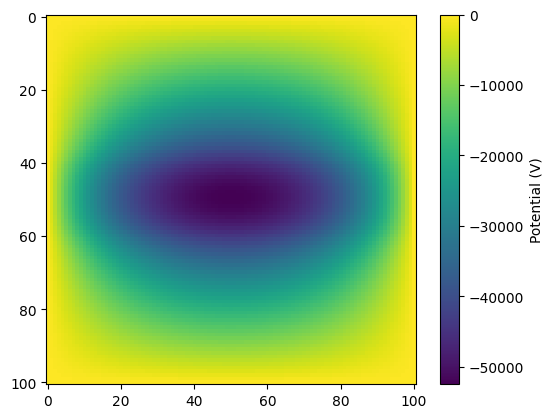

In [ ]:
#slab of electrons in the middle (conductor top and bottom: grounded)
#set up grid
nx,ny = 100,100
phi_ori = np.zeros([nx+1,ny+1],float)
phi_new = np.zeros([nx+1,ny+1],float)

#Boundary conditions
phi_ori[0,:] = 0
phi_ori[nx,:] =0
phi_ori[:,0] = phi_ori[:,ny]
#phi_ori[:,ny] = 0
#phi_ori[:,0] = 0

#length of domain and grid spacing
L = 1
delta = L/nx
#charge density
rho = np.zeros([nx+1,ny+1],float)
rho[40:60,:] = 1e12* (1.6e-19) #C/m^2
epsilon = 8.85e-12 #F/m

#covergence check
threshold = 1e-5
diff = 1
iteration = 0
a = []


while diff > threshold:

    for i in range (1,nx):
        for j in range (1,ny):
            #if i ==0 or i ==100 or j==0 or j ==100:
             #   phi_new[i,j] = phi_ori[i,j]
            #else:
            phi_new[i,j]= 1/4*(phi_new[i+1,j]+phi_new[i-1,j]+phi_new[i,j+1]+phi_new[i,j-1]-rho[i,j]/epsilon*delta)
    
    
    diff = np.max(abs(phi_new-phi_ori))

    #swapping so that phi_ori is updated
    phi_ori = phi_new.copy()
    iteration+=1

    if iteration %200 ==0:
        print (f"Iteration: {iteration}, Max Difference: {diff:.2e}")
plt.imshow(phi_new)
plt.colorbar(label="Potential (V)")

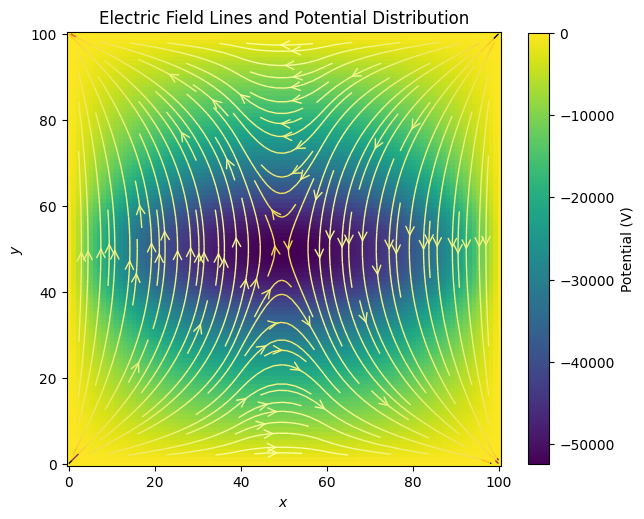

In [11]:
#https://scipython.com/blog/visualizing-a-vector-field-with-matplotlib/
# Electric field components
# Ex = -dV/dx
# Ey = -dV/dy

# Create arrays for the field components
Ex = np.zeros([nx + 1, ny + 1], float)
Ey = np.zeros([nx + 1, ny + 1], float)

x = np.linspace(0, nx, nx + 1)
y = np.linspace(0, ny, ny + 1)
X, Y = np.meshgrid(x, y)

# Calculate the electric field components from the potential
for i in range(1, nx):
    for j in range(1, ny):
        #row of an array is 'i' (y-direction)
        #column of an array is 'j' (x-direction)
        Ex[i, j] = -(phi_new[i, j + 1] - phi_new[i, j - 1]) / 2.0
        Ey[i, j] = -(phi_new[i + 1, j] - phi_new[i - 1, j]) / 2.0

fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('Electric Field Lines and Potential Distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

#transpose Ex and Ey to align with X and Y
magnitude = np.hypot(Ex.T, Ey.T)
color = 2 * np.log(magnitude + 1e-9)

ax.streamplot(X, Y, Ex.T, Ey.T, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=1.5, arrowstyle='->', arrowsize=1.5)

plt.imshow(phi_new, origin='lower')
plt.colorbar(label="Potential (V)",shrink=0.8)
plt.show()